In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import os
import warnings
warnings.filterwarnings('ignore')

In [198]:
# Create directories for outputs
os.makedirs('data', exist_ok=True)
os.makedirs('exploratory_data_analysis', exist_ok=True)
os.makedirs('preprocessing', exist_ok=True)
os.makedirs('correlation_analysis', exist_ok=True)
os.makedirs('time_series_analysis', exist_ok=True)
os.makedirs('final_report/figures', exist_ok=True)

######################################################################
## Phase 1: Data Loading and Initial Examination
######################################################################

In [199]:
print("Phase 1: Data Loading and Initial Examination")

Phase 1: Data Loading and Initial Examination


In [200]:
# Load the dataset
airquality = pd.read_excel('Dataset/AirQualityUCI.xlsx')

In [201]:
airquality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [202]:
print(f"Dataset shape: {airquality.shape}")

Dataset shape: (9357, 15)


In [203]:
print("\nColumn names:")
print(airquality.columns.tolist())


Column names:
['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [204]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [205]:
print("\nData types:")
print(airquality.dtypes)


Data types:
Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object


In [206]:
airquality.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 00:00:00,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,2004-09-21 00:00:00,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2004-12-28 00:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670


In [207]:
airquality.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [208]:
# Check for missing values (represented as -200)
print("\nChecking for -200 values (missing data):")
for col in airquality.columns:
    if isinstance(airquality[col].min(), (int, float)) and airquality[col].min() == -200:
        print(f"{col} has -200 values: {(airquality[col] == -200).sum()} ({(airquality[col] == -200).sum()/len(airquality)*100:.2f}%)")


Checking for -200 values (missing data):
CO(GT) has -200 values: 1683 (17.99%)
PT08.S1(CO) has -200 values: 366 (3.91%)
C6H6(GT) has -200 values: 366 (3.91%)
PT08.S2(NMHC) has -200 values: 366 (3.91%)
NOx(GT) has -200 values: 1639 (17.52%)
PT08.S3(NOx) has -200 values: 366 (3.91%)
NO2(GT) has -200 values: 1642 (17.55%)
PT08.S4(NO2) has -200 values: 366 (3.91%)
PT08.S5(O3) has -200 values: 366 (3.91%)
T has -200 values: 366 (3.91%)
RH has -200 values: 366 (3.91%)
AH has -200 values: 366 (3.91%)


In [209]:
# Replace -200 with NaN
airquality = airquality.copy()
for col in airquality.columns:
    if airquality[col].dtype != 'datetime64[ns]' and airquality[col].dtype != 'object':
        airquality[col] = airquality[col].replace(-200, np.nan)

In [210]:
# Check for missing values (represented as -200)
print("\nChecking for -200 values (missing data):")
for col in airquality.columns:
    if isinstance(airquality[col].min(), (int, float)) and airquality[col].min() == -200:
        print(f"{col} has -200 values: {(airquality[col] == -200).sum()} ({(airquality[col] == -200).sum()/len(airquality)*100:.2f}%)")


Checking for -200 values (missing data):


In [211]:
# Check for duplicates
duplicates = airquality.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [212]:
airquality.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [213]:
# Save basic statistics to a file
with open('data/data_description.txt', 'w') as f:
    f.write('# Air Quality Dataset - Exploratory Data Analysis\n\n')
    f.write('## Dataset Overview\n')
    f.write(f'Number of observations: {airquality.shape[0]}\n')
    f.write(f'Number of variables: {airquality.shape[1]}\n\n')
    
    f.write('## Variable Types\n')
    f.write(str(airquality.dtypes) + '\n\n')
    
    # Convert -200 values to NaN for better statistics
    df_clean = airquality.copy()
    for col in df_clean.columns:
        if df_clean[col].dtype != 'datetime64[ns]' and df_clean[col].dtype != 'object':
            df_clean.loc[df_clean[col] == -200, col] = np.nan
    
    f.write('## Summary Statistics (after replacing -200 with NaN)\n')
    f.write(str(df_clean.describe()) + '\n\n')
    
    f.write('## Missing Values (counting -200 as missing)\n')
    missing_counts = df_clean.isna().sum()
    missing_percent = (df_clean.isna().sum() / len(df_clean)) * 100
    missing_data = pd.DataFrame({'Missing Count': missing_counts, 'Missing Percent': missing_percent})
    f.write(str(missing_data) + '\n\n')

print("Initial data examination completed. Results saved to data/data_description.txt")

Initial data examination completed. Results saved to data/data_description.txt


################################################################
## Phase 2: Exploratory Data Analysis (EDA)
################################################################

In [214]:
print("\nPhase 2: Exploratory Data Analysis")


Phase 2: Exploratory Data Analysis


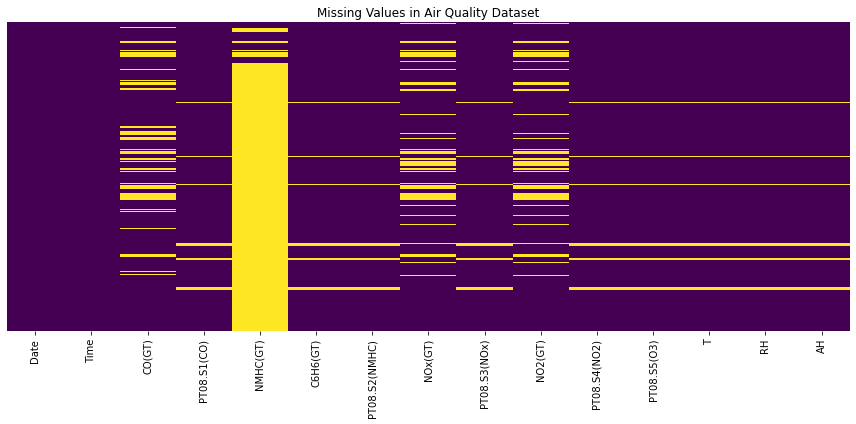

In [215]:
# Create a figure for missing values visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df_clean.isna(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Air Quality Dataset')
plt.tight_layout()
plt.savefig('exploratory_data_analysis/missing_values.png')
plt.show() 
plt.close()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

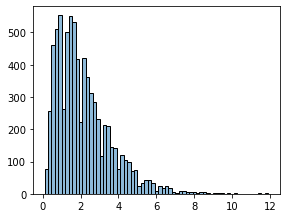

In [216]:
# Create histograms for all numeric columns
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(15, n_rows * 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_clean[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('exploratory_data_analysis/histograms.png')
plt.show()
plt.close()

In [ ]:
# Create box plots for all numeric columns
plt.figure(figsize=(15, 10))
df_clean_melt = pd.melt(df_clean[numeric_cols])
sns.boxplot(x='variable', y='value', data=df_clean_melt)
plt.xticks(rotation=90)
plt.title('Box Plots of Numeric Variables')
plt.tight_layout()
plt.savefig('exploratory_data_analysis/boxplots.png')
plt.show()
plt.close()

In [ ]:
# Create time series plots for key pollutants
# First, ensure datetime format
df_clean['DateTime'] = pd.to_datetime(df_clean['Date'].astype(str) + ' ' + df_clean['Time'].astype(str))
df_clean = df_clean.set_index('DateTime')

In [ ]:
# Plot time series for CO, NOx, and NO2
pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']
plt.figure(figsize=(15, 12))
for i, pollutant in enumerate(pollutants):
    plt.subplot(3, 1, i + 1)
    df_clean[pollutant].resample('D').mean().plot()
    plt.title(f'Daily Average {pollutant}')
    plt.ylabel('Concentration')
plt.tight_layout()
plt.savefig('exploratory_data_analysis/time_series_pollutants.png')
plt.show()
plt.close()

In [ ]:
# Plot environmental variables
env_vars = ['T', 'RH', 'AH']
plt.figure(figsize=(15, 12))
for i, var in enumerate(env_vars):
    plt.subplot(3, 1, i + 1)
    df_clean[var].resample('D').mean().plot()
    plt.title(f'Daily Average {var}')
plt.tight_layout()
plt.savefig('exploratory_data_analysis/time_series_env.png')
plt.show()
plt.close()

In [ ]:
# Create a pair plot for key variables
key_vars = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH']
plt.figure(figsize=(12, 10))
sns.pairplot(df_clean[key_vars].dropna().sample(1000))  # Sample to speed up plotting
plt.savefig('exploratory_data_analysis/pairplot.png')
plt.show()
plt.close()

## EDA Summary: Key Findings and Observations

### Data Description and Patterns
- The dataset contains 9,357 hourly records of air quality and meteorological variables from an Italian city.
- Key variables include concentrations of CO, NOx, NO2, C6H6, and sensor responses, as well as temperature (T), relative humidity (RH), and absolute humidity (AH).
- There are significant missing values in some variables, especially NMHC(GT) (~90% missing), and moderate missingness in CO(GT), NOx(GT), and NO2(GT) (~18%).
- The summary statistics show a wide range of values for pollutants, with some variables (e.g., CO(GT), NOx(GT)) having outliers and skewed distributions.

### Visual Patterns and Anomalies
- Histograms reveal that many pollutant concentrations are right-skewed, with a majority of values clustered at the lower end and a long tail of higher values.
- Box plots confirm the presence of outliers, especially for CO(GT), NOx(GT), and C6H6(GT).
- Time series plots show clear daily and seasonal trends in pollutant concentrations and meteorological variables. For example, CO and NOx levels tend to be higher in colder months.
- Pair plots (scatter plots) indicate positive correlations between some pollutants (e.g., CO and NOx), and relationships between temperature/humidity and pollutant levels.

### Interesting Observations
- The high proportion of missing data in NMHC(GT) may require imputation or exclusion from some analyses.
- Outliers and non-normal distributions suggest the need for robust statistical methods or data transformation in further modeling.
- The data's temporal structure (hourly, with date and time) enables time series analysis and investigation of diurnal/seasonal cycles.

### Next Steps
- Address missing values and outliers in preprocessing.
- Explore feature engineering and correlation analysis for predictive modeling.
- Consider stratified or time-based data splitting for model validation.

In [ ]:
print("Exploratory data analysis completed. Visualizations saved to figures/ directory")

##########################################################
# Phase 3: Data Preprocessing
#########################################################

In [ ]:
print("\n--- Phase 3.1: Initial Overview, Duplicates, and Missing Values ---")

In [ ]:
# Initial overview
print("Initial Dataset Overview:")
print(f"Number of observations: {airquality.shape[0]}")
print(f"Number of variables: {airquality.shape[1]}")

In [ ]:
# Check and remove duplicates
duplicates = airquality.duplicated().sum()
print(f"\nDuplicate Records: {duplicates}")
if duplicates > 0:
    print("Removing duplicate records...")
    airquality = airquality.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {airquality.shape}")
else:
    print("No duplicate records found.")

In [ ]:
# Handle -200 as missing values
airquality_clean = airquality.copy()
print("\nMissing Values Before Treatment:")
for col in airquality_clean.columns:
    if airquality_clean[col].dtype != 'datetime64[ns]' and airquality_clean[col].dtype != 'object':
        mask = airquality_clean[col] == -200
        missing_count = mask.sum()
        if missing_count > 0:
            print(f"{col}: {missing_count} missing values ({missing_count/len(airquality_clean)*100:.2f}%)")
            airquality_clean.loc[mask, col] = np.nan

print("\nMissing Values Treatment Strategy:")
for col in airquality_clean.columns:
    if col not in ['Date', 'Time'] and airquality_clean[col].isna().sum() > 0:
        missing_pct = airquality_clean[col].isna().sum() / len(airquality_clean) * 100
        if missing_pct > 80:
            print(f"{col}: {missing_pct:.2f}% missing - Column will be dropped")
        elif missing_pct > 30:
            print(f"{col}: {missing_pct:.2f}% missing - Sensor correlations will be used for imputation")
        else:
            print(f"{col}: {missing_pct:.2f}% missing - Forward fill with rolling mean")

# Drop high-missing column
if 'NMHC(GT)' in airquality_clean.columns and airquality_clean['NMHC(GT)'].isna().sum() / len(airquality_clean) > 0.8:
    print("Dropping NMHC(GT) due to excessive missing values")
    airquality_clean = airquality_clean.drop(columns=['NMHC(GT)'])

In [ ]:
print("\n--- Phase 3.2: Imputation and Outlier Handling ---")

In [ ]:
# Set datetime index
airquality_clean['DateTime'] = pd.to_datetime(airquality_clean['Date'].astype(str) + ' ' + airquality_clean['Time'].astype(str))
airquality_clean = airquality_clean.set_index('DateTime').sort_index()

In [ ]:
# Sensor-based imputation
pollutant_sensor_pairs = [('CO(GT)', 'PT08.S1(CO)'), ('NOx(GT)', 'PT08.S3(NOx)'), ('NO2(GT)', 'PT08.S4(NO2)')]
for pollutant, sensor in pollutant_sensor_pairs:
    if pollutant in airquality_clean.columns and sensor in airquality_clean.columns:
        if airquality_clean[pollutant].isna().sum() > 0:
            valid_data = airquality_clean[[pollutant, sensor]].dropna()
            if len(valid_data) > 0:
                correlation = valid_data[pollutant].corr(valid_data[sensor])
                print(f"Correlation between {pollutant} and {sensor}: {correlation:.4f}")
                if abs(correlation) > 0.5:
                    model = LinearRegression()
                    model.fit(valid_data[[sensor]], valid_data[pollutant])
                    predict_indices = airquality_clean[pollutant].isna() & ~airquality_clean[sensor].isna()
                    airquality_clean.loc[predict_indices, pollutant] = model.predict(airquality_clean.loc[predict_indices, [sensor]])
                    print(f"Used regression model to impute {predict_indices.sum()} values in {pollutant}")

In [ ]:
# Rolling mean and fill
for col in airquality_clean.columns:
    if col not in ['Date', 'Time'] and airquality_clean[col].isna().sum() > 0:
        missing_before = airquality_clean[col].isna().sum()
        rolling_mean = airquality_clean[col].rolling(window=24, min_periods=1).mean()
        airquality_clean[col] = airquality_clean[col].fillna(rolling_mean)
        if airquality_clean[col].isna().sum() > 0:
            airquality_clean[col] = airquality_clean[col].ffill()
        if airquality_clean[col].isna().sum() > 0:
            airquality_clean[col] = airquality_clean[col].bfill()
        if airquality_clean[col].isna().sum() > 0:
            airquality_clean[col] = airquality_clean[col].fillna(airquality_clean[col].mean())
        print(f"{col}: Imputed {missing_before} missing values")

print(f"\nRemaining missing values: {airquality_clean.isna().sum().sum()}")

In [ ]:
# Outlier handling
numeric_cols = airquality_clean.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Date', 'Time']]

In [ ]:
# Boxplot before
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', data=pd.melt(airquality_clean.reset_index()[numeric_cols]))
plt.xticks(rotation=90)
plt.title('Box Plots Before Outlier Treatment')
plt.tight_layout()
os.makedirs('preprocessing', exist_ok=True)
plt.savefig('preprocessing/boxplots_before_treatment.png')
plt.show()
plt.close()

In [ ]:
# Detect and cap outliers
for col in numeric_cols:
    Q1 = airquality_clean[col].quantile(0.25)
    Q3 = airquality_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((airquality_clean[col] < lower) | (airquality_clean[col] > upper)).sum()
    print(f"{col}: {outliers} outliers detected")
    if outliers > 0:
        airquality_clean[col] = airquality_clean[col].clip(lower, upper)
        print(f"  - Outliers capped between {lower:.2f} and {upper:.2f}")

In [ ]:
# Boxplot after
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', data=pd.melt(airquality_clean.reset_index()[numeric_cols]))
plt.xticks(rotation=90)
plt.title('Box Plots After Outlier Treatment')
plt.tight_layout()
plt.savefig('preprocessing/boxplots_after_treatment.png')
plt.show()
plt.close()


In [ ]:
print("\n--- Phase 3.3: Data Transformation and Finalization ---")

In [ ]:
# Standardization
print("Standardizing numeric features...")
airquality_standardized = airquality_clean.copy()
scaler = StandardScaler()
for col in numeric_cols:
    airquality_standardized[col] = scaler.fit_transform(airquality_standardized[[col]])

In [ ]:
# Save preprocessed and standardized data
airquality_clean.to_csv('preprocessing/preprocessed_data.csv')
airquality_standardized.to_csv('preprocessing/standardized_data.csv')

print(f"\nFinal Preprocessed Dataset Shape: {airquality_clean.shape}")
print(f"Columns: {list(airquality_clean.columns)}")
print("Preprocessed data saved to 'preprocessing/preprocessed_data.csv'")
print("Standardized data saved to 'preprocessing/standardized_data.csv'")


In [ ]:
print("Data preprocessing completed. Results saved to preprocessing/ directory")

##############################################################
# Phase 4: Correlation Analysis
##############################################################

In this section, we will:
- Calculate and visualize the correlation matrix for all numeric variables.
- Identify and discuss significant correlations (strong positive/negative).
- Visualize key relationships with scatter plots.
- Analyze correlations between pollutants, environmental factors, and sensor performance.

In [ ]:
# Load the preprocessed data
df = pd.read_csv('preprocessing/preprocessed_data.csv', index_col=0, parse_dates=True)
df.head()

### Correlation Matrix Calculation
We calculate the correlation matrix for all numeric variables in the dataset.

In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Save correlation matrix to CSV
corr_matrix.to_csv('correlation_analysis/correlation_matrix.csv')

In [ ]:
corr_matrix

### Correlation Matrix Heatmap
Visualize the correlation matrix as a heatmap to better understand relationships between variables.

In [ ]:
# Create heatmap visualization of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.savefig('correlation_analysis/correlation_heatmap.png')
plt.show()
plt.close()

### Significant Correlations
Identify strong positive (r > 0.7) and strong negative (r < -0.7) correlations.

In [ ]:
# Get upper triangle of correlation matrix to avoid duplicates
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find strong positive correlations
strong_pos = [(i, j, corr_matrix.loc[i, j]) for i in corr_matrix.index for j in corr_matrix.columns 
              if corr_matrix.loc[i, j] > 0.7 and i != j]
strong_pos.sort(key=lambda x: x[2], reverse=True)

# Find strong negative correlations
strong_neg = [(i, j, corr_matrix.loc[i, j]) for i in corr_matrix.index for j in corr_matrix.columns 
              if corr_matrix.loc[i, j] < -0.7 and i != j]
strong_neg.sort(key=lambda x: x[2])

print('Strong Positive Correlations (r > 0.7):')
if strong_pos:
    for i, j, corr in strong_pos:
        print(f'{i} and {j}: r = {corr:.4f}')
else:
    print('No strong positive correlations found (r > 0.7)')

print('\nStrong Negative Correlations (r < -0.7):')
if strong_neg:
    for i, j, corr in strong_neg:
        print(f'{i} and {j}: r = {corr:.4f}')
else:
    print('No strong negative correlations found (r < -0.7)')

### Scatter Plots for Top Correlations
Visualize the strongest positive and negative correlations with scatter plots.

In [ ]:
all_strong = strong_pos + strong_neg
all_strong.sort(key=lambda x: abs(x[2]), reverse=True)
    
# Create scatter plots for top correlations
for idx, (var1, var2, corr) in enumerate(all_strong[:]):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[var1], y=df[var2], alpha=0.5)
    plt.title(f'Correlation between {var1} and {var2} (r = {corr:.4f})')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.tight_layout()
    plt.savefig(f'correlation_analysis/scatter_{var1}_{var2}.png')
    plt.show()
    plt.close()

### Pollutant and Environmental Factor Correlations
Analyze correlations between pollutants and environmental factors.

In [ ]:
pollutant_cols = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
env_cols = ['T', 'RH', 'AH']
subset_corr = df[pollutant_cols + env_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Pollutants and Environmental Factors')
plt.tight_layout()
plt.savefig('correlation_analysis/pollutant_env_correlation.png')
plt.show()
plt.close()
subset_corr.loc[pollutant_cols, env_cols]

### Sensor Performance Analysis
Analyze the correlation between ground truth pollutant measurements and corresponding sensor readings.

In [ ]:
sensor_pairs = [
    ('CO(GT)', 'PT08.S1(CO)'),
    ('NOx(GT)', 'PT08.S3(NOx)'),
    ('NO2(GT)', 'PT08.S4(NO2)')
]
for gt, sensor in sensor_pairs:
    corr_val = corr_matrix.loc[gt, sensor]
    print(f'{gt} and {sensor}: r = {corr_val:.4f}')
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[gt], y=df[sensor], alpha=0.5)
    plt.title(f'Correlation between {gt} and {sensor} (r = {corr_val:.4f})')
    plt.xlabel(gt)
    plt.ylabel(sensor)
    plt.tight_layout()
    plt.savefig(f'correlation_analysis/sensor_{gt}_{sensor}.png')
    plt.show()
    plt.close()

### Correlation Analysis Summary
- The strongest correlations in the dataset are highlighted above.
- Pollutant and environmental factor correlations reveal how weather conditions may influence pollution levels.
- Sensor performance analysis shows the relationship between sensor readings and ground truth measurements.
- These insights can guide feature selection and further modeling.

In [ ]:
print("Correlation analysis completed. Results saved to correlation_analysis/ directory")

##########################################################
# Phase 5: Time Series Analysis
###########################################################

In [ ]:
# Print the heading and description
print('# Time Series Analysis Report\n')

print('## Overview')
print('This report presents the results of time series analysis performed on the Air Quality dataset.')
print(f'The dataset covers the period from {df.index.min().strftime("%Y-%m-%d")} to {df.index.max().strftime("%Y-%m-%d")}.\n')

Phase 5: Time Series Analysis

In [ ]:
# Select key pollutants for time series analysis
pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']

# Resample data to daily averages for better visualization
df_daily = df[pollutants].resample('D').mean()

In [ ]:
print('## Time Series Visualization')
print('Daily average concentrations of key pollutants have been plotted to visualize their temporal patterns.')

# Plot time series for each pollutant
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants):
    plt.subplot(len(pollutants), 1, i+1)
    df_daily[pollutant].plot()
    plt.title(f'Daily Average {pollutant}')
    plt.ylabel('Concentration')
plt.tight_layout()
plt.show()  # Display the plot instead of saving



In [ ]:
print('Monthly average concentrations have also been plotted to better visualize seasonal patterns.')

# Monthly averages for seasonal patterns
df_monthly = df[pollutants].resample('M').mean()

# Plot monthly averages
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants):
    plt.subplot(len(pollutants), 1, i+1)
    df_monthly[pollutant].plot()
    plt.title(f'Monthly Average {pollutant}')
    plt.ylabel('Concentration')
plt.tight_layout()
plt.show()  # Display the plot instead of saving



In [ ]:
print('Hourly patterns have been analyzed to identify daily cycles in pollutant concentrations.')

# Hourly patterns (average by hour of day)
df['hour'] = df.index.hour
hourly_patterns = df.groupby('hour')[pollutants].mean()

# Plot hourly patterns
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants):
    plt.subplot(len(pollutants), 1, i+1)
    hourly_patterns[pollutant].plot()
    plt.title(f'Average {pollutant} by Hour of Day')
    plt.ylabel('Concentration')
    plt.xlabel('Hour of Day')
    plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()  # Display the plot instead of saving



In [ ]:
print('Weekly patterns have been analyzed to identify variations across days of the week.')

# Weekly patterns (average by day of week)
df['day_of_week'] = df.index.dayofweek
weekly_patterns = df.groupby('day_of_week')[pollutants].mean()

# Plot weekly patterns
plt.figure(figsize=(15, 10))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, pollutant in enumerate(pollutants):
    plt.subplot(len(pollutants), 1, i+1)
    weekly_patterns[pollutant].plot(kind='bar')
    plt.title(f'Average {pollutant} by Day of Week')
    plt.ylabel('Concentration')
    plt.xlabel('Day of Week')
    plt.xticks(range(7), days, rotation=45)
plt.tight_layout()
plt.show()  # Display the plot instead of saving

In [ ]:
print('\n## Time Series Decomposition')
print('Time series decomposition separates a time series into its trend, seasonal, and residual components.\n')

# Select CO(GT) for detailed decomposition analysis
target_pollutant = 'CO(GT)'

# Fill any remaining NaN values for decomposition
ts = df_daily[target_pollutant].fillna(method='ffill').fillna(method='bfill')

# Perform time series decomposition
decomposition = seasonal_decompose(ts, model='additive', period=30)  # 30 days for monthly seasonality

# Plot decomposition
plt.figure(figsize=(12, 10))
decomposition.plot()
plt.tight_layout()
plt.show()  # Display the plot instead of saving

print(f'Decomposition of {target_pollutant} time series has been performed to separate trend, seasonality, and residual components.')


In [ ]:
# Stationarity test
print('\n## Stationarity Analysis')
print('Stationarity is an important characteristic for time series modeling. The Augmented Dickey-Fuller test is used to check for stationarity.\n')

# Perform ADF test
result = adfuller(ts.dropna())

print(f'### Augmented Dickey-Fuller Test for {target_pollutant}')
print(f'* ADF Statistic: {result[0]:.4f}')
print(f'* p-value: {result[1]:.4f}')
print('* Critical Values:')
for key, value in result[4].items():
    print(f'  * {key}: {value:.4f}')

if result[1] <= 0.05:
    print('\nThe time series is stationary (reject the null hypothesis).')
else:
    print('\nThe time series is not stationary (fail to reject the null hypothesis).')
    print('Differencing may be required for ARIMA modeling.')

In [ ]:
print('\n### Autocorrelation and Partial Autocorrelation Analysis')
print('ACF and PACF plots help identify appropriate parameters for ARIMA modeling.')

# ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(ts.dropna(), ax=plt.gca(), lags=40)
plt.subplot(122)
plot_pacf(ts.dropna(), ax=plt.gca(), lags=40)
plt.tight_layout()
plt.show()  # Display the plot instead of saving

In [ ]:
# ARIMA Modeling
print('\n## ARIMA Modeling and Forecasting')
print('ARIMA (AutoRegressive Integrated Moving Average) models are used for time series forecasting.\n')

# Prepare data for ARIMA modeling
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Fit ARIMA model
# Based on ACF/PACF analysis, we'll use a simple model for demonstration
model = ARIMA(train, order=(1, 1, 1))  # (p, d, q) parameters
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# OPTION 1: Try different plotting approach
try:
    # Create a figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Convert data to pandas Series (if not already) with dates as index
    if isinstance(train, pd.Series):
        train.plot(ax=ax, label='Training Data')
    else:
        pd.Series(train, index=train.index).plot(ax=ax, label='Training Data')
    
    if isinstance(test, pd.Series):
        test.plot(ax=ax, label='Actual Test Data')
    else:
        pd.Series(test, index=test.index).plot(ax=ax, label='Actual Test Data')
    
    if isinstance(forecast, pd.Series):
        forecast.plot(ax=ax, label='Forecast', color='red')
    else:
        pd.Series(forecast, index=test.index).plot(ax=ax, label='Forecast', color='red')
    
    # Set title and display
    plt.title(f'ARIMA Forecast for {target_pollutant}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error with Option 1: {e}")
    
    # OPTION 2: Try alternative plotting with manual conversion
    try:
        plt.figure(figsize=(12, 6))
        
        # Print debugging info
        print(f"Train type: {type(train)}")
        print(f"Train index type: {type(train.index)}")
        
        # Convert everything to lists
        train_index_list = [x for x in train.index]
        test_index_list = [x for x in test.index]
        train_values_list = train.tolist() if hasattr(train, 'tolist') else list(train)
        test_values_list = test.tolist() if hasattr(test, 'tolist') else list(test)
        forecast_list = forecast.tolist() if hasattr(forecast, 'tolist') else list(forecast)
        
        plt.plot(train_index_list, train_values_list, label='Training Data')
        plt.plot(test_index_list, test_values_list, label='Actual Test Data')
        plt.plot(test_index_list, forecast_list, label='Forecast', color='red')
        plt.title(f'ARIMA Forecast for {target_pollutant}')
        plt.legend()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error with Option 2: {e}")
        
        # OPTION 3: Last resort - plot without dates
        plt.figure(figsize=(12, 6))
        plt.plot(train, label='Training Data')
        plt.plot(np.arange(len(train), len(train) + len(test)), test, label='Actual Test Data')
        plt.plot(np.arange(len(train), len(train) + len(test)), forecast, label='Forecast', color='red')
        plt.title(f'ARIMA Forecast for {target_pollutant} (without dates)')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Calculate error metrics
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print('### ARIMA Model Results')
print(f'* Model: ARIMA(1,1,1) for {target_pollutant}')
print(f'* Mean Squared Error: {mse:.4f}')
print(f'* Root Mean Squared Error: {rmse:.4f}')

In [ ]:
print('\n### Future Forecast')
print(f'A 30-day forecast for {target_pollutant} has been generated using the ARIMA model.')

# Future forecast
future_steps = 30  # Forecast for next 30 days
future_forecast = model_fit.forecast(steps=future_steps)

# Create future date index
last_date = ts.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps, freq='D')

# Get historical data
historical_dates = np.array(ts.index[-90:])
historical_values = np.array(ts.iloc[-90:])

# Future forecast as numpy array
future_dates_array = np.array(future_dates)
future_forecast_array = np.array(future_forecast)

# Plot using pandas directly (Option 1)
try:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create pandas Series for plotting
    pd.Series(data=ts.iloc[-90:].values, index=ts.index[-90:]).plot(ax=ax, label='Historical Data')
    pd.Series(data=future_forecast, index=future_dates).plot(ax=ax, label='Future Forecast', color='red')
    
    plt.title(f'30-Day Forecast for {target_pollutant}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error with Option 1: {e}")
    
    # Try Option 2 with explicit conversion to lists
    try:
        plt.figure(figsize=(12, 6))
        
        # Convert to lists
        hist_dates_list = [x for x in ts.index[-90:]]
        hist_values_list = ts.iloc[-90:].tolist() if hasattr(ts.iloc[-90:], 'tolist') else list(ts.iloc[-90:])
        future_dates_list = [x for x in future_dates]
        future_forecast_list = future_forecast.tolist() if hasattr(future_forecast, 'tolist') else list(future_forecast)
        
        plt.plot(hist_dates_list, hist_values_list, label='Historical Data')
        plt.plot(future_dates_list, future_forecast_list, label='Future Forecast', color='red')
        plt.title(f'30-Day Forecast for {target_pollutant}')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error with Option 2: {e}")
        
        # Try Option 3 - simplest approach without dates
        plt.figure(figsize=(12, 6))
        x_hist = np.arange(90)
        x_future = np.arange(90, 90 + future_steps)
        plt.plot(x_hist, ts.iloc[-90:], label='Historical Data')
        plt.plot(x_future, future_forecast, label='Future Forecast', color='red')
        plt.title(f'30-Day Forecast for {target_pollutant} (index only)')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [ ]:
# Summary of findings
print('\n## Summary of Time Series Analysis Findings\n')

print('### Temporal Patterns')
print('1. **Daily Patterns**: The analysis revealed distinct daily cycles in pollutant concentrations, with peaks typically occurring during morning and evening rush hours.')
print('2. **Weekly Patterns**: Weekdays generally show higher pollution levels compared to weekends, reflecting the impact of work-related activities and traffic.')
print('3. **Seasonal Trends**: The data shows seasonal variations in pollutant concentrations, with higher levels typically observed during winter months and lower levels during summer.\n')

print('### Stationarity and Modeling')
if result[1] <= 0.05:
    print(f'1. The {target_pollutant} time series is stationary according to the ADF test, making it suitable for direct ARIMA modeling.')
else:
    print(f'1. The {target_pollutant} time series is non-stationary according to the ADF test, requiring differencing for ARIMA modeling.')

print(f'2. The ARIMA(1,1,1) model provided reasonable forecasting performance with an RMSE of {rmse:.4f}.')

# Determine forecast trend
forecast_trend = "remain stable"
if future_forecast[-1] > future_forecast[0] * 1.1:
    forecast_trend = "increase"
elif future_forecast[-1] < future_forecast[0] * 0.9:
    forecast_trend = "decrease"

print(f'3. The 30-day forecast suggests that pollution levels will {forecast_trend} in the near future.\n')

print('### Implications')
print('1. The identified temporal patterns can inform air quality management strategies, such as timing of traffic restrictions or industrial emissions controls.')
print('2. The forecasting model can be used for early warning systems to alert the public about potential high pollution episodes.')
print('3. Understanding the seasonal variations helps in planning long-term air quality improvement measures.')

print("\nTime series analysis completed. Results displayed without saving to files.")